In [1]:
import torch
import torchvision

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15365194.30it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 683089.60it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4540259.59it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3412850.01it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



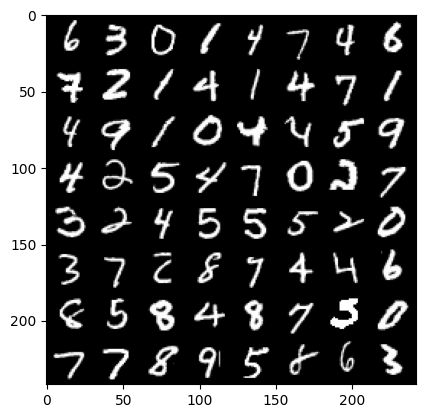

tensor([6, 3, 0, 1, 4, 7, 4, 6, 7, 2, 1, 4, 1, 4, 7, 1, 4, 9, 1, 0, 4, 4, 5, 9,
        4, 2, 5, 4, 7, 0, 2, 7, 3, 2, 4, 5, 5, 5, 2, 0, 3, 7, 2, 8, 7, 4, 4, 6,
        8, 5, 8, 4, 8, 7, 5, 0, 7, 7, 8, 9, 5, 8, 6, 3])


In [3]:
# Visualize some examples from the training dataset
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Use next() to get the first batch of images and labels

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(labels)

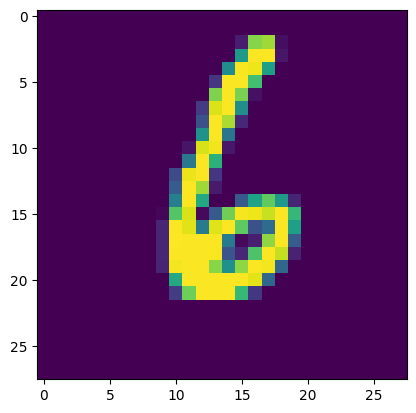

In [4]:
img = np.transpose(images[0].numpy(), (1, 2, 0))

plt.imshow(img)
plt.show()

In [5]:
print(np.unique(img))
print(np.max(img))
print(np.min(img))

[0.         0.00392157 0.01568628 0.02352941 0.03529412 0.04313726
 0.05490196 0.05882353 0.0627451  0.07058824 0.07450981 0.08235294
 0.09411765 0.10196079 0.10588235 0.10980392 0.15686275 0.16078432
 0.17254902 0.23137255 0.24705882 0.2627451  0.2784314  0.28235295
 0.28627452 0.2901961  0.3372549  0.34901962 0.3882353  0.4
 0.4117647  0.41568628 0.43137255 0.48235294 0.49411765 0.5019608
 0.5137255  0.5372549  0.5647059  0.5686275  0.5803922  0.6039216
 0.60784316 0.6431373  0.6666667  0.67058825 0.69803923 0.72156864
 0.73333335 0.7529412  0.75686276 0.78039217 0.78431374 0.8
 0.80784315 0.81960785 0.8235294  0.83137256 0.8352941  0.85882354
 0.8745098  0.9137255  0.91764706 0.9411765  0.9490196  0.9529412
 0.95686275 0.9607843  0.972549   0.9764706  0.98039216 0.9843137
 0.9882353  0.99215686 0.99607843 1.        ]
1.0
0.0


In [6]:
import torch.nn as nn
import torch.optim as optim


# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 32),
            nn.ReLU(True)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the model, define the loss function and the optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the autoencoder
num_epochs = 20
for epoch in range(num_epochs):
    for data in trainloader:
        inputs, _ = data
        inputs = inputs.view(-1, 28 * 28)
        outputs = model(inputs)
        loss = criterion(outputs, inputs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 0.0336
Epoch [2/20], Loss: 0.0243
Epoch [3/20], Loss: 0.0220
Epoch [4/20], Loss: 0.0162
Epoch [5/20], Loss: 0.0148
Epoch [6/20], Loss: 0.0136
Epoch [7/20], Loss: 0.0145
Epoch [8/20], Loss: 0.0148
Epoch [9/20], Loss: 0.0149
Epoch [10/20], Loss: 0.0134
Epoch [11/20], Loss: 0.0113
Epoch [12/20], Loss: 0.0139
Epoch [13/20], Loss: 0.0103
Epoch [14/20], Loss: 0.0121
Epoch [15/20], Loss: 0.0119
Epoch [16/20], Loss: 0.0120
Epoch [17/20], Loss: 0.0101
Epoch [18/20], Loss: 0.0094
Epoch [19/20], Loss: 0.0100
Epoch [20/20], Loss: 0.0107


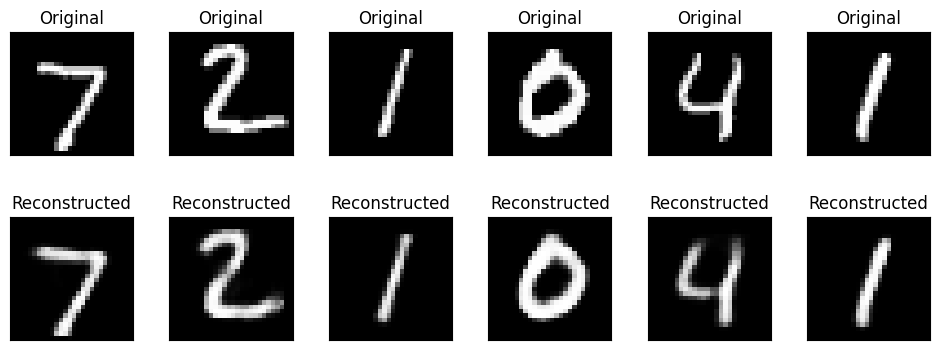

In [9]:
# Function to visualize some results
def visualize_reconstruction(model, data_loader):
    model.eval()
    with torch.no_grad():
        dataiter = iter(data_loader)
        images, _ = next(dataiter)  # Use next() to get the first batch of images and labels
        images = images.view(-1, 28 * 28)
        outputs = model(images)

        # Show original and reconstructed images
        plt.figure(figsize=(12, 4))
        for i in range(6):
            ax = plt.subplot(2, 6, i + 1)
            plt.imshow(images[i].view(28, 28).cpu().numpy(), cmap='gray')
            plt.title("Original")
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

        for i in range(6):
            ax = plt.subplot(2, 6, i + 7)
            plt.imshow(outputs[i].view(28, 28).cpu().numpy(), cmap='gray')
            plt.title("Reconstructed")
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

        plt.subplots_adjust(hspace=0.5)  # Adjust the height space between rows
        plt.show()

# Visualize some reconstructed images
visualize_reconstruction(model, testloader)